# INTERMEDIATE LEVEL TASK

# Task 3: Prediction using Decision Tree Algorithm 

## 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2 - Checking for null value 

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

here,is no null value in dataset

In [8]:
data.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 3 - Describing the dataset  

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4 - Visualization

### i - scatter plot 

<Axes: xlabel='petal_length', ylabel='petal_width'>

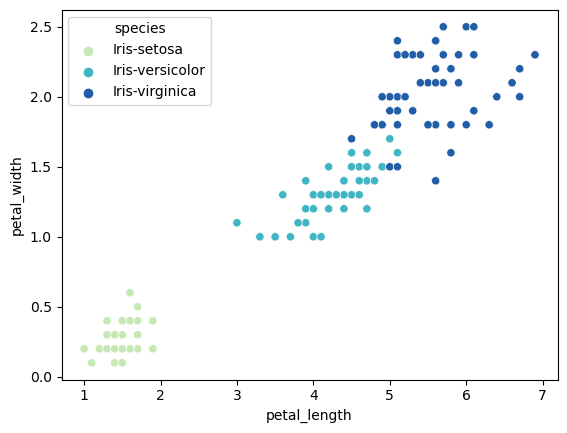

In [10]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data, palette = 'YlGnBu' )

### ii - pair plot 

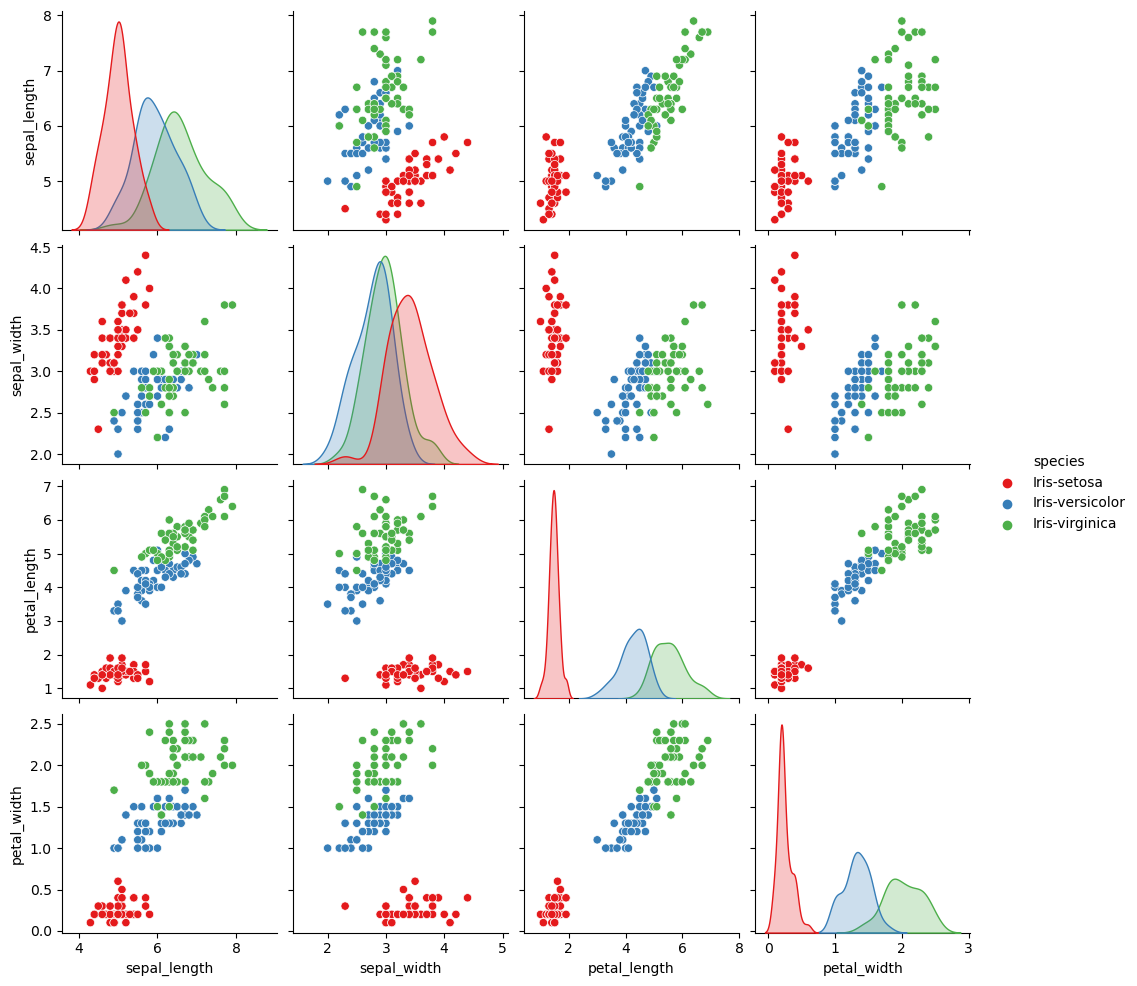

In [11]:
sns.pairplot(data, hue = 'species', palette = 'Set1')

### iii - box plots

<Axes: xlabel='species', ylabel='sepal_width'>

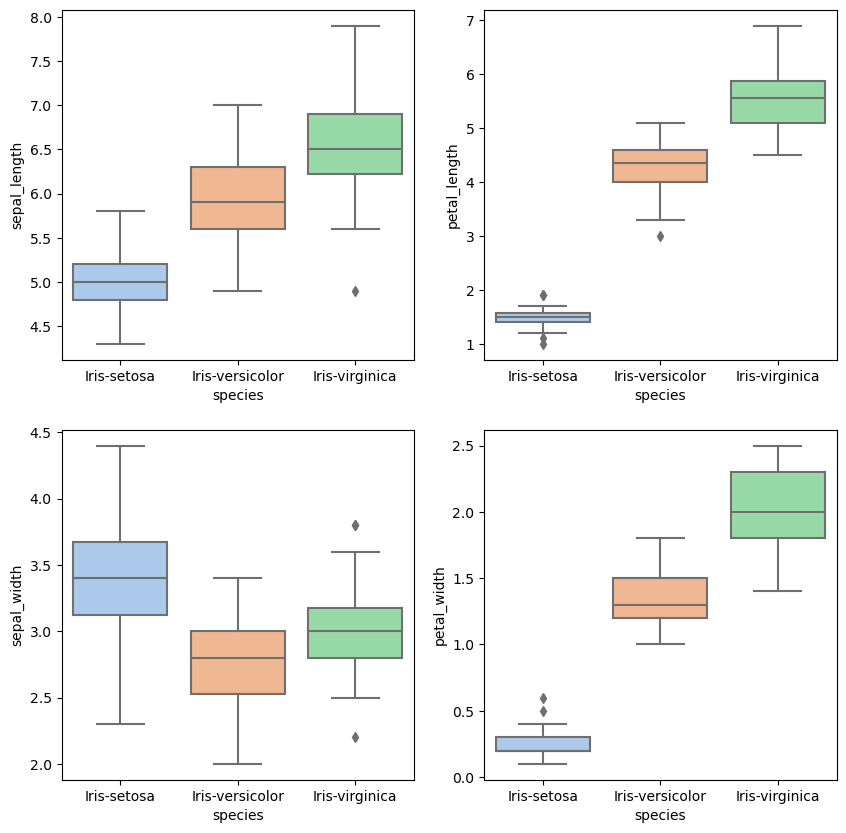

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.boxplot(y = 'petal_length', x = 'species', data = data, palette = 'pastel')

plt.subplot(2,2,1)
sns.boxplot(y = 'sepal_length', x = 'species', data = data, palette = 'pastel')

plt.subplot(2,2,4)
sns.boxplot(y = 'petal_width', x = 'species', data = data, palette = 'pastel')

plt.subplot(2,2,3)
sns.boxplot(y = 'sepal_width', x = 'species', data = data, palette = 'pastel')


In [13]:
data = data.sample(frac = 1)
# Suffling the data for tasting

In [14]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
35,5.0,3.2,1.2,0.2,Iris-setosa
65,6.7,3.1,4.4,1.4,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor


## 5 - Label Encoding 

In [15]:
label_encoder = preprocessing.LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
# Changing the categorical data into numeric data

In [16]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,0
146,6.3,2.5,5.0,1.9,2
123,6.3,2.7,4.9,1.8,2
130,7.4,2.8,6.1,1.9,2
51,6.4,3.2,4.5,1.5,1
...,...,...,...,...,...
35,5.0,3.2,1.2,0.2,0
65,6.7,3.1,4.4,1.4,1
6,4.6,3.4,1.4,0.3,0
74,6.4,2.9,4.3,1.3,1


## 6 - Splitting the dataset

In [17]:
X = data.drop(['species'], axis = 1)
Y = data.species

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
23,5.1,3.3,1.7,0.5
146,6.3,2.5,5.0,1.9
123,6.3,2.7,4.9,1.8
130,7.4,2.8,6.1,1.9
51,6.4,3.2,4.5,1.5
...,...,...,...,...
35,5.0,3.2,1.2,0.2
65,6.7,3.1,4.4,1.4
6,4.6,3.4,1.4,0.3
74,6.4,2.9,4.3,1.3


In [19]:
Y

23     0
146    2
123    2
130    2
51     1
      ..
35     0
65     1
6      0
74     1
105    2
Name: species, Length: 150, dtype: int32

In [20]:
# Saprating the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)

In [21]:
X_train.shape

(112, 4)

In [22]:
X_test.shape

(38, 4)

# Model Building for Decision Tree 

## 7 - Building the Decision Tree Model 

In [23]:
DTCL = DecisionTreeClassifier()
DTCL.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
Y_pred = DTCL.predict(X_test)

In [25]:
#checking the accuracy of model
print(accuracy_score(Y_test, Y_pred)*100)

97.36842105263158


In [26]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



## 8 - Plotting The Confusion Matrix 

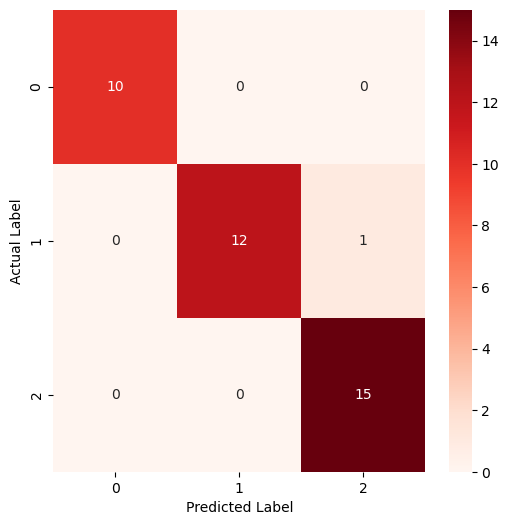

In [27]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [28]:
#predicting the Iris-setosa flower
sample = np.array([[5.1,3.5,1.4,0.2]]) 
print("The prediction is : ", int(DTCL.predict(sample)))

The prediction is :  0


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
# predicting the Iris-versicolor flower
sample = np.array([[5.6,2.7,4.2,1.3]]) 
print("The prediction is : ", int(DTCL.predict(sample)))

The prediction is :  1


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 9 -  Visualizing the Decision Tree

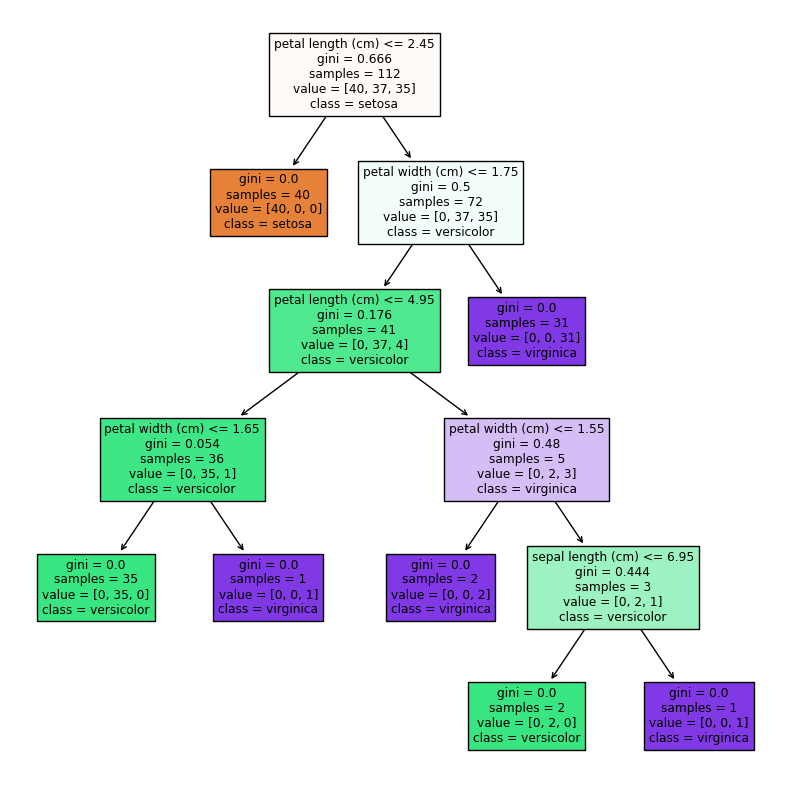

In [30]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (10,10))
tree.plot_tree(DTCL, feature_names = features, class_names = species, filled = True);

# Thank you😇!